In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [16]:
# Helper functions
from sklearn import metrics
# helper function to print accuracy, precision, recall, F1
def print_4_metrics(target_test, predicted):
  print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test,predicted)))
  print("%-12s %f" % ('Precision:', metrics.precision_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('Recall:', metrics.recall_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('F1 Score:', metrics.f1_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)

    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [18]:
# loading in the dataset
address = "clean_data.csv"
json_df = pd.read_csv(address)
df = pd.DataFrame(json_df)

df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep totally nails why congress is falling ...
2,1,inclement weather prevents liar from getting t...
3,1,mother comes pretty close to using word stream...
4,0,my white inheritance


In [19]:
# splitting the dataset
data_unlabeled = df['headline']
# data_unlabeled.head()
data_labels = df['is_sarcastic']
# data_labels.head()
len(data_unlabeled)

data_unlabeled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 24415 entries, 0 to 24414
Series name: headline
Non-Null Count  Dtype 
--------------  ----- 
24415 non-null  object
dtypes: object(1)
memory usage: 190.9+ KB


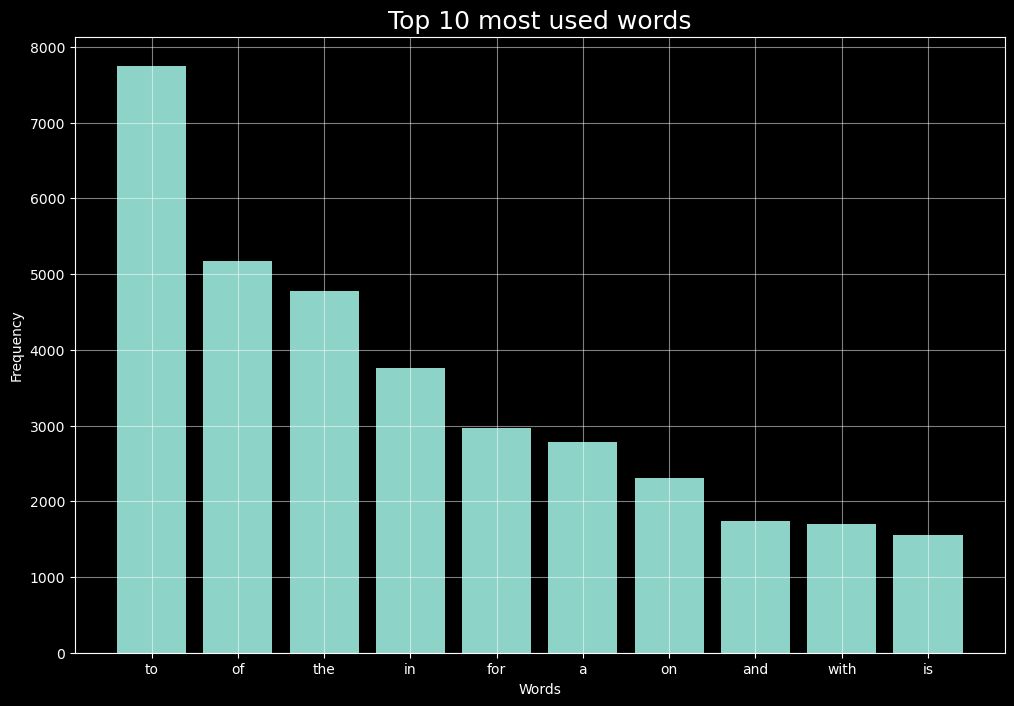

In [21]:
# getting the top 10 most used words
import collections

words = []
for text in df['headline']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
plt.grid(alpha = 0.5)
plt.title('Top 10 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

<Axes: >

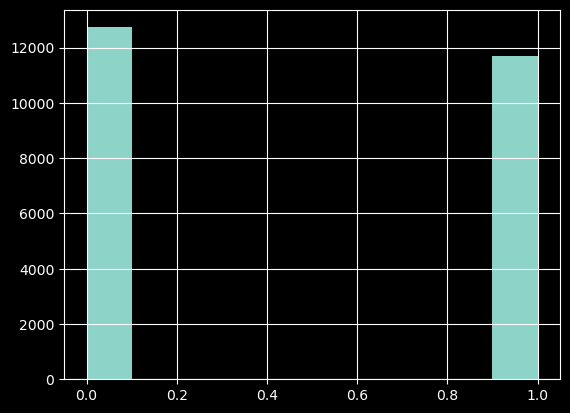

In [30]:
# to show labels
data_labels.hist() 

time for data analysis
(inspiration taken from Sarcasm detection with AutoKeras project by MARCOS GOIS)

In [33]:
# vectorizing the data
from sklearn.feature_extraction.text import TfidfVectorizer

n=1
ngram_range=(n, n)
vectorizer = TfidfVectorizer(ngram_range=ngram_range)
X = vectorizer.fit_transform(data_unlabeled)
tfidf_matrix = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())
X.shape

(24415, 25184)

In [34]:
# normalization
from sklearn import preprocessing
X = preprocessing.normalize(X)
print(X)

  (0, 13124)	0.3448634810977658
  (0, 9833)	0.318252616180258
  (0, 15458)	0.11608992114236018
  (0, 4107)	0.37562498247953385
  (0, 6594)	0.42131894187604646
  (0, 23711)	0.38246610725576974
  (0, 19613)	0.2966391518990861
  (0, 22528)	0.4619834347935221
  (1, 7442)	0.30944519465702613
  (1, 17820)	0.31328839808947617
  (1, 9098)	0.29448975296848
  (1, 15553)	0.12982110638686206
  (1, 20179)	0.284701894087479
  (1, 7946)	0.30944519465702613
  (1, 11620)	0.1447668314796453
  (1, 4589)	0.24381701642664247
  (1, 24644)	0.19008996352656746
  (1, 14784)	0.3278607943449977
  (1, 22837)	0.27770074881349543
  (1, 18512)	0.3027500269880094
  (1, 5794)	0.3645524206958585
  (2, 24861)	0.2810091710373384
  (2, 22707)	0.10782553114091693
  (2, 9179)	0.2802508402599679
  (2, 8816)	0.19731080510074275
  :	:
  (24412, 84)	0.40370087589212955
  (24412, 17757)	0.33876207574233214
  (24412, 1799)	0.3315411272403336
  (24412, 24482)	0.3007753128128753
  (24412, 3127)	0.34970539958348595
  (24412, 20986)	

In [35]:
# split the full dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data_labels, train_size = 0.8, test_size=0.2, random_state=4)

Accuracy:    0.820193
Precision:   0.814186
Recall:      0.805771
F1 Score:    0.809957


Confusion Matrix: 



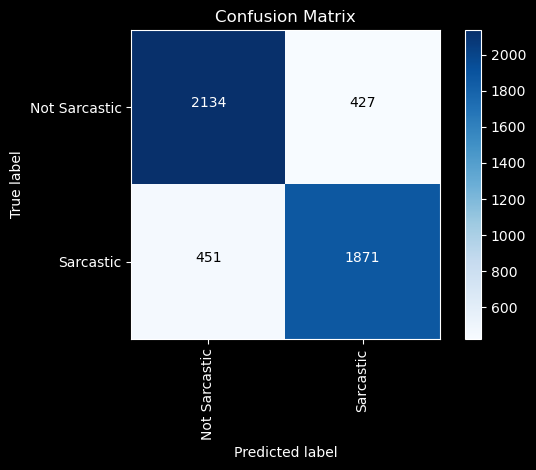

In [36]:
# fitting the dataset to a logistic regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty=None)
log_reg.fit(X_train, y_train)
log_predicted = log_reg.predict(X_test)
log_score = log_reg.predict_proba(X_test)[:,1]

print_4_metrics(y_test, log_predicted)

print("\n\nConfusion Matrix: \n")
draw_confusion_matrix(y_test, log_predicted, ['Not Sarcastic', 'Sarcastic'])

In [39]:
# testing lambda values to optimize logistic regression model
from sklearn import model_selection

lambda_list = np.linspace(start = 0, stop = 1, num = 20)
accuracy_list = []
for lambd in lambda_list:
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    # Train the model
    log_model_kfold_train = LogisticRegression(C = 1/lambd)
    log_results_kfold_train = model_selection.cross_val_score(log_model_kfold_train, X_train, y_train, cv=kfold)
    # Calculate accuracy
    accuracy = log_results_kfold_train.mean()
    # Append lambda and accuracy to the lists
    accuracy_list.append(accuracy)
    print("For lambda=",lambd, ", accuracy across folds is: %.2f%%" % (log_results_kfold_train.mean()*100.0))

# Plot the scatter plot
plt.figure()
plt.scatter(lambda_list, accuracy_list)
plt.plot(lambda_list, accuracy_list)
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Lambda')
plt.show()

# optimal lambda= 0.2631578947368421

/var/folders/7m/96byd5t10cv56c0j69_vjtpw0000gn/T/ipykernel_8946/2834345856.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  log_model_kfold_train = LogisticRegression(C = 1/lambd)


For lambda= 0.0 , accuracy across folds is: 81.86%


/Users/bin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Accuracy:    0.848008
Precision:   0.835471
Recall:      0.844132
F1 Score:    0.839779


Confusion Matrix: 



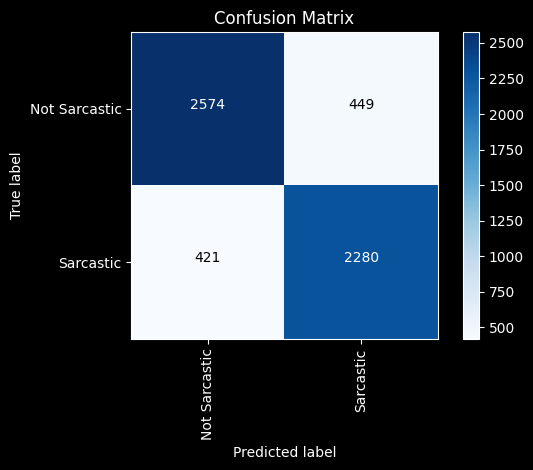

In [21]:
# implementing the optimized logistic regression model
lambd = 0.2631578947368421 # this is the optimal lambda

log_reg = LogisticRegression(penalty='l2', C=1/lambd)
log_reg.fit(X_train, y_train)
log_predicted = log_reg.predict(X_test)
log_score = log_reg.predict_proba(X_test)[:,1]

print_4_metrics(y_test, log_predicted)

print("\n\nConfusion Matrix: \n")
draw_confusion_matrix(y_test, log_predicted, ['Not Sarcastic', 'Sarcastic'])

[link text](https://)With an accuracy rate of 81%, this model is the most accurate so far.

In [22]:
# printing predicted vs actual labels
print("label\tP(Y=1)\tCorrect?")
for i in range(0,10):
    print(y_test.iloc[i], " ", log_score[i], " ", str((y_test.iloc[i] == 1 and log_score[i] >= 0.5) or (y_test.iloc[i] == 0 and log_score[i] < 0.5)))

label	P(Y=1)	Correct?
1   0.8240664841022808   True
0   0.04237846970225186   True
0   0.06180076406820498   True
0   0.01474099141569774   True
1   0.652101040683463   True
0   0.17462154730874543   True
1   0.757655413635964   True
1   0.4268052668976924   False
1   0.9497419545564904   True
0   0.07786996144108212   True


In [23]:
# printing accuracy rates
accuracy_list

[0.8194791493777913,
 0.838915336496363,
 0.8434577369267485,
 0.8450738389983613,
 0.8450738389983613,
 0.8450302281082298,
 0.8447245703297144,
 0.8443751299646495,
 0.843982116864213,
 0.8441131975405443,
 0.8438074825298895,
 0.8434144121973135,
 0.8432396252439519,
 0.8421914949225553,
 0.8412305482266621,
 0.8412306436135608,
 0.8408813367901544,
 0.8406629771014211,
 0.840269925846225,
 0.8394837088715539]

SVM Model

RNN Model

In [24]:
# because the data is too much for the SVM and RNN models to run efficiently, I will split the data to 25% of it's original size
data_shortened = df.sample(frac =.25)

# checking if sample is 0.25 times data or not

if (0.25*(len(df))== len(data_shortened)):
    print( "Cool")
    print(len(df), len(data_shortened))

# display
data_shortened

,is_sarcastic,headline,article_link
20058,1,noisy upstairs neighbors wake man at 3 p.m.,https://local.theonion.com/noisy-upstairs-neig...
7324,0,elementary school teacher accused in rape of f...,https://www.huffingtonpost.com/entry/darcy-smi...
8807,1,study finds humans crave sweet foods because t...,https://www.theonion.com/study-finds-humans-cr...
15944,0,you don't need god to have a life purpose: rabbi,https://www.huffingtonpost.com/entry/rabbi-lev...
20380,0,amazon offering 'more deals than black friday'...,https://www.huffingtonpost.com/entry/amazon-pr...
...,...,...,...
5451,1,heaven prepares for huge rush of college kids ...,https://www.theonion.com/heaven-prepares-for-h...
11965,1,lottery loser angry at lottery winner,https://www.theonion.com/lottery-loser-angry-a...
3559,1,gray wolves sighted in capitol building for fi...,https://www.theonion.com/gray-wolves-sighted-i...
4698,0,busy philipps consoles michelle williams on 10...,https://www.huffingtonpost.com/entry/busy-phil...


Time to implement the SVM Model!

In [25]:
# cleaning the shortened dataset
data_unlabeled_shortened = data_shortened['headline']
data_labels_shortened = data_shortened['is_sarcastic']

data_shortened.drop_duplicates(subset=['headline'], inplace = True)
data_shortened.duplicated().sum()

data_clean_shortened = data_unlabeled_shortened.replace('[^ -~]+', '', regex=True) # clean data; get rid of weird characters
data_clean_shortened = data_clean_shortened.str.replace('[^\w\s]','', regex=True) # remove punctuation
data_clean_shortened = data_clean_shortened.replace('_', '', regex=True) # remove underscores
data_clean_shortened = data_clean_shortened.replace('\d+', '', regex=True) # remove numbers
data_clean_shortened

20058             noisy upstairs neighbors wake man at  pm
7324     elementary school teacher accused in rape of f...
8807     study finds humans crave sweet foods because t...
15944       you dont need god to have a life purpose rabbi
20380    amazon offering more deals than black friday i...
                               ...                        
5451     heaven prepares for huge rush of college kids ...
11965                lottery loser angry at lottery winner
3559     gray wolves sighted in capitol building for fi...
4698     busy philipps consoles michelle williams on th...
19474    trump asks national prayer breakfast to pray f...
Name: headline, Length: 7126, dtype: object

In [26]:
data_clean_shortened = data_clean_shortened.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) # remove stop words
data_clean_shortened = data_clean_shortened.apply(lambda x: " ".join(x.lower() for x in x.split())) # to lower case TODO fixxxx
data_clean_shortened

20058                 noisy upstairs neighbors wake man pm
7324     elementary school teacher accused rape former ...
8807     study finds humans crave sweet foods theyre we...
15944                     dont need god life purpose rabbi
20380    amazon offering deals black friday epic prime ...
                               ...                        
5451     heaven prepares huge rush college kids spring ...
11965                   lottery loser angry lottery winner
3559     gray wolves sighted capitol building first tim...
4698     busy philipps consoles michelle williams th an...
19474    trump asks national prayer breakfast pray cele...
Name: headline, Length: 7126, dtype: object

In [27]:
# vectorizing the sample dataset
n=1
ngram_range=(n, n)
vectorizer = TfidfVectorizer(ngram_range=ngram_range)
X = vectorizer.fit_transform(data_clean_shortened)
tfidf_matrix = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())
X.shape

(7126, 14080)

In [28]:
# splitting the sample dataset
X_train, X_test, y_train, y_test = train_test_split(X, data_labels_shortened, train_size = 0.8, test_size=0.2, random_state=4)

Accuracy:    0.754558
Precision:   0.791667
Recall:      0.678571
F1 Score:    0.730769
SVM Model Performance Results:

AUC of ROC:  0.8546399055489966


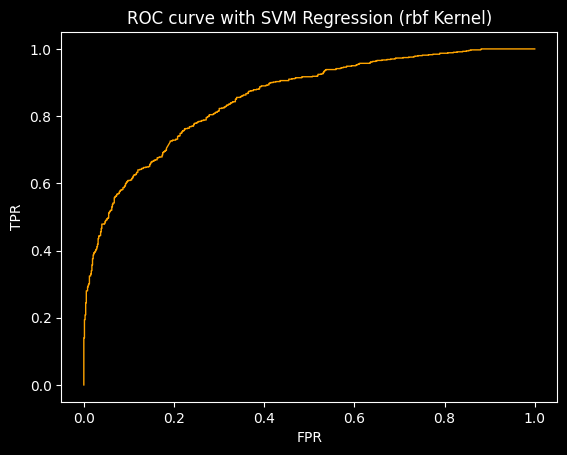

In [29]:
# SVM Model with no Regularization (C -> inf, lambda -> 0)
import numpy as np
from sklearn.svm import SVC
from matplotlib import pyplot

svm = SVC(probability = True, C=1e10)

svm.fit(X_train, y_train)

svm_predicted = svm.predict(X_test)
svm_score = svm.predict_proba(X_test)[:,1]

print_4_metrics(y_test, svm_predicted)

# Plot ROC curve and report area under ROC
# use metrics.roc_curve(your y_test, predicted probabilities for y_test)
# feel free to use the same code as 3.1.1.
'''your code goes below here'''
fpr_svm_reg, tpr_svm_reg, thresholds = metrics.roc_curve(y_test,svm_score)
print("SVM Model Performance Results:\n")
pyplot.figure(1)
pyplot.plot(fpr_svm_reg, tpr_svm_reg, color='orange', lw=1)
pyplot.title("ROC curve with SVM Regression (rbf Kernel)")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
# report auc
# use metrics.auc(fpr, tpr)
aucroc = metrics.auc(fpr_svm_reg, tpr_svm_reg)
print('AUC of ROC: ', aucroc)

Confusion Matrix: 



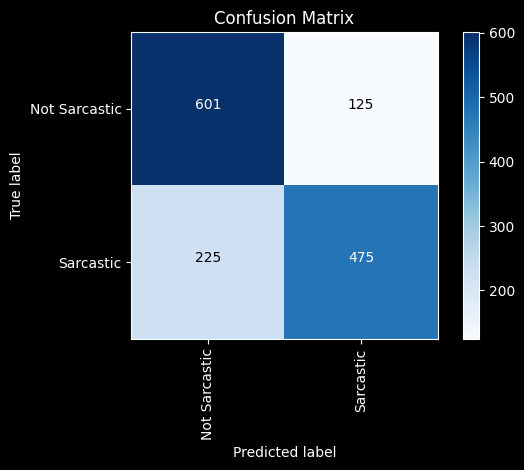

In [30]:
print("Confusion Matrix: \n")
draw_confusion_matrix(y_test, svm_predicted, ['Not Sarcastic', 'Sarcastic'])

In [ ]:
# from sklearn import model_selection

# lambda_list = np.linspace(start = 1, stop = 2, num = 20)
# accuracy_list = []
# for lambd in lambda_list:
#     kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
#     # Train the model
#     svc_model_kfold_train = SVC(probability = True, C = 1/lambd)
#     svc_results_kfold_train = model_selection.cross_val_score(svc_model_kfold_train, X_train, y_train, cv=kfold)
#     # Calculate accuracy
#     accuracy = svc_results_kfold_train.mean()
#     # Append lambda and accuracy to the lists
#     accuracy_list.append(accuracy)

#     print("For lambda=",lambd, ", accuracy across folds is: %.2f%%" % (svc_results_kfold_train.mean()*100.0))

In [ ]:
# # Plot the scatter plot
# plt.figure()
# plt.scatter(lambda_list, accuracy_list)
# plt.plot(lambda_list, accuracy_list)
# plt.xlabel('Lambda (Regularization Parameter)')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs. Lambda')
# plt.show()

In [ ]:
# comparison of label vs svm model's calculated value of P(Y=1|X)
# print("label\tP(Y=1)\tCorrect?")
# for i in range(0,10):
#     print(y_test.iloc[i], " ", svm_score[i], " ", str((y_test.iloc[i] == 1 and svm_score[i] >= 0.5) or (y_test.iloc[i] == 0 and svm_score[i] < 0.5)))

In [ ]:
# SVM Model with Regularization from CV (lambda=1.526315789473684)


# lambd=1.263157894736842
# svm = SVC(probability = True, C=1/lambd)

# svm.fit(X_train, y_train)

# svm_predicted = svm.predict(X_test)
# svm_score = svm.predict_proba(X_test)[:,1]

# print_4_metrics(y_test, svm_predicted)

# # Plot ROC curve and report area under ROC
# # use metrics.roc_curve(your y_test, predicted probabilities for y_test)
# # feel free to use the same code as 3.1.1.
# '''your code goes below here'''
# fpr_svm_reg, tpr_svm_reg, thresholds = metrics.roc_curve(y_test,svm_score)
# print("SVM Model Performance Results:\n")
# pyplot.figure(1)
# pyplot.plot(fpr_svm_reg, tpr_svm_reg, color='orange', lw=1)
# pyplot.title("ROC curve with SVM Regression (rbf Kernel)")
# pyplot.xlabel('FPR')
# pyplot.ylabel('TPR')
# # report auc
# # use metrics.auc(fpr, tpr)
# aucroc = metrics.auc(fpr_svm_reg, tpr_svm_reg)
# print('AUC of ROC: ', aucroc)

Let's begin with the RNN Model!

In [31]:
# tokenizing and padding the data for RNN
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

max_features = 2000

tokenizer = Tokenizer(max_features, split = ' ')
tokenizer.fit_on_texts(data_clean_shortened)
X_tokenized = tokenizer.texts_to_sequences(data_clean_shortened)
X_padded = pad_sequences(X_tokenized)

X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_padded, data_labels_shortened, test_size=0.2, random_state=4)

In [32]:
X_padded.shape

(7126, 16)

In [33]:
'''
- embedding space controls the size of the vector representations of the features.
  (e.g. if the vector has dimension of 2, then for the word 'cat', it could have
   a corresponding dense vector of [0.8, 1], where 0.8 quantifies the size of the animal
   and 1 quantifies some other characteristic of it. by representing the words as
   vectors, this allows the program to identify similarities between different words)
- num_layers is the number of LSTM units in each of the hidden layers of the NN
- dense layer essentially does the mathy stuff. like the weighted sum of inputs from
  previous layer and applying the activation stuff
'''

from keras.models import Sequential
from keras.layers import Embedding, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import layers, regularizers

model = Sequential()

# hyperparams

embed_vec_size = 120 # hyperparam that controls size of embedding vector
num_layers = 200 # also hyperparam
batch_size = 32
learning_rate=0.0001
dropout_rate = 0.5
reg_strength = 0.005
patience = 10

# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam']
# batch_size = [16,32,64,128,256]

model.add(Embedding(input_dim=max_features, output_dim=embed_vec_size))
model.add(layers.LSTM(num_layers, dropout=dropout_rate, return_sequences=True))
model.add(BatchNormalization())
model.add(layers.LSTM(num_layers, dropout=dropout_rate))  # Additional LSTM layer
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(units=50, activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
# model.add(Dropout(dropout_rate))
model.add(Dense(units=1, activation='sigmoid'))

early_stopping = EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)

model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train_rnn, y_train, epochs=100, batch_size=batch_size, validation_data=(X_test_rnn, y_test), callbacks=[early_stopping]) # , callbacks=[early_stopping]
score = model.evaluate(X_test_rnn, y_test) # 2-element vector containing loss, and accuracy

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/100
179/179 [==============================] - 35s 162ms/step - loss: 1.2140 - accuracy: 0.5323 - val_loss: 1.0662 - val_accuracy: 0.4909
Epoch 2/100
179/179 [==============================] - 23s 131ms/step - loss: 1.1429 - accuracy: 0.5400 - val_loss: 1.0396 - val_accuracy: 0.5084
Epoch 3/100
179/179 [==============================] - 21s 119ms/step - loss: 1.0718 - accuracy: 0.5704 - val_loss: 0.9965 - val_accuracy: 0.5491
Epoch 4/100
179/179 [==============================] - 19s 108ms/step - loss: 1.0162 - accuracy: 0.5954 - val_loss: 0.9679 - val_accuracy: 0.5659
Epoch 5/100
179/179 [==============================] - 22s 124ms/step - loss: 0.9652 - accuracy: 0.6256 - val_loss: 0.8828 - val_accuracy: 0.6809
Epoch 6/100
179/179 [==============================] - 22s 121ms/step - loss: 0.9156 - accuracy: 0.6621 - val_loss: 0.8468 - val_accuracy: 0.6964
Epoch 7/100
179/179 [==============================] - 28s 157ms/step - loss: 0.8701 - accuracy: 0.6774 - val_loss: 0.8263 -

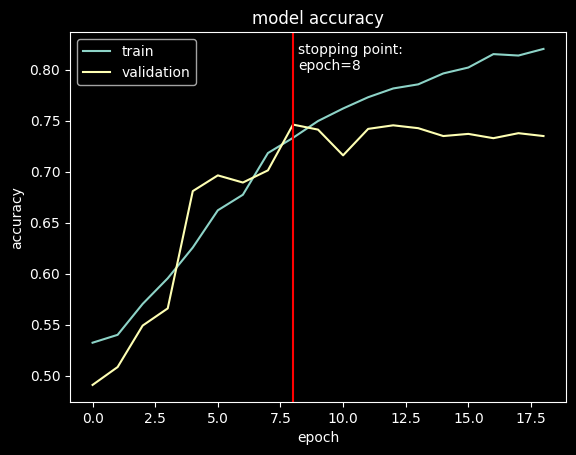

In [34]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
stop_epoch = early_stopping.stopped_epoch-patience
plt.axvline(stop_epoch, color='r')
label = 'stopping point: \nepoch=' + str(stop_epoch)
plt.text(stop_epoch+0.2, .8, label, rotation=0)
plt.show()

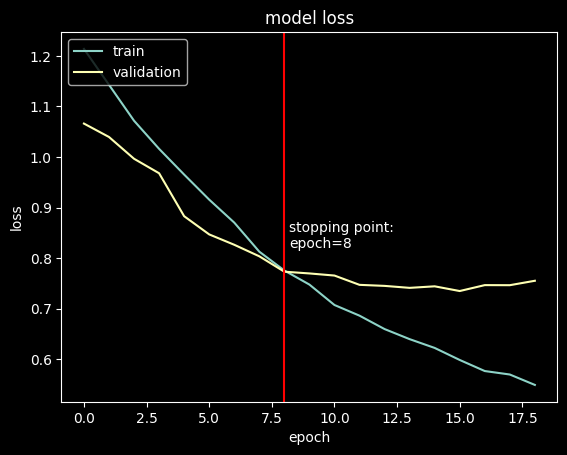

In [35]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.axvline(stop_epoch, color='r')
plt.text(stop_epoch+0.2,.82, label,rotation=0)
plt.show()

In [37]:
!pip install scikeras

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import layers, regularizers
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

#https://www.geeksforgeeks.org/hyperparameter-tuning-using-gridsearchcv-and-kerasclassifier/#

def create_model(batch_size=32, num_layers=200, dropout_rate=0.5, embed_vec_size=120, learning_rate=0.0001, optimizer='adam'):
    model = Sequential()
    model.add(Embedding(input_dim=max_features, output_dim=embed_vec_size))
    model.add(layers.LSTM(num_layers, dropout=dropout_rate, return_sequences=True))
    model.add(BatchNormalization())
    model.add(layers.LSTM(num_layers, dropout=dropout_rate))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=50, activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

param_grid = {
    # 'batch_size': [32, 64, 128],
    'num_layers': [150, 200, 250],
    # 'dropout_rate': [0.3, 0.5, 0.7],
    # 'embed_vec_size': [120, 160, 200],
    'learning_rate': [0.001, 0.0001, 0.00001],
    'optimizer':['adam', 'sgd', 'rmsprop']
}

model = KerasClassifier(model=create_model, loss="binary_crossentropy", dropout_rate=0.5, embed_vec_size=120, learning_rate=0.0001, num_layers=200)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(X_train_rnn, y_train_rnn, callbacks=[early_stopping])

best_params=grid_result.best_params_
accuracy=grid_result.best_score_

print("best params: ", best_params)
print("best accuracy: ", accuracy)

ModuleNotFoundError: ignored

In [ ]:
# print("Grid Search CV best accuracy: ", grid_result.best_estimator_.score(X_train_rnn, y_train_rnn))

In [ ]:
# from keras.models import Sequential
# from keras.layers import Embedding, Dense, BatchNormalization, Dropout
# from keras.optimizers import Adam
# from keras.callbacks import EarlyStopping
# from keras import layers, regularizers
# from sklearn.model_selection import GridSearchCV
# from scikeras.wrappers import KerasClassifier

# embed_vec_size = 120 # hyperparam that controls size of embedding vector
# num_layers = 200 # also hyperparam
# batch_size = 32
# learning_rate=1e-5
# dropout_rate = 0.5
# reg_strength = 0.005
# patience = 100

# model = Sequential()

# model.add(Embedding(input_dim=max_features, output_dim=embed_vec_size))
# model.add(layers.LSTM(num_layers, dropout=dropout_rate, return_sequences=True))
# model.add(BatchNormalization())
# model.add(layers.LSTM(num_layers, dropout=dropout_rate))  # Additional LSTM layer
# model.add(BatchNormalization())
# model.add(Dropout(dropout_rate))
# model.add(Dense(units=50, activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
# # model.add(Dropout(dropout_rate))
# model.add(Dense(units=1, activation='sigmoid'))

# early_stopping = EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)

# model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
# hist = model.fit(X_train_rnn, y_train, epochs=100, batch_size=batch_size, validation_data=(X_test_rnn, y_test), callbacks=[early_stopping]) # , callbacks=[early_stopping]
# score = model.evaluate(X_test_rnn, y_test) # 2-element vector containing loss, and accuracy

# print('Test loss: ', score[0])
# print('Test accuracy: ', score[1])